# JOB CLASSIFICATION PREDICTION

Classifying a job based on the following bases like types of programming languages skils and years of experience in the whole criteria which classify the most accurate job according to your skills and knowlege of area.

To run this code install some preliminaries download libraries which are dependencies libraries to run this code in jupyter notebook

==> Python user install from pip method

- pip install numpy
- pip install pandas 
- pip install scikit-learn
- pip install matplotlib
- pip install seaborn

==> Anaconda user install from conda method

- conda install -c anaconda numpy
- conda install -c anaconda pandas
- conda install -c conda-forge matplotlib
- conda install -c anaconda seaborn
- conda install -c anaconda scikit-learn


In [2]:
#importing necessary libraries
import numpy as np  #library list or array manipluations 
import pandas as pd  #library for data handling 
from matplotlib import pyplot as plt #plot graphs
from sklearn.model_selection import train_test_split #sceientific calculations
import seaborn as sns #ploting graphs
%matplotlib inline 

## Importing Data

Importing data from the some folder, for different location find the exact path 
e.g('C:\Users\imtia\Job_titlepredictions\'TechJobs_Standardization_Final_Version1.csv')

In [3]:
#imoport data with function read_csv in df variable 
df = pd.read_csv('TechJobs_Standardization_Final_Version.csv',index_col=0)

## Data Cleaning  

Remvoving special character in each column's vale of data and then remoivig alphabets from cloumn (year of experience)

In [4]:
for column in df.columns:
    df[column] = df[column].replace('[\W]','',regex=True)
df = df.replace({'Years of Experience':'[A-Za-z]'},'',regex=True)

Checking for Data with missing value in the columns of any data to assure that data have no missing values 

In [5]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Your email if you are interested to get the results,1097,0.486475
job_classify,53,0.023503
Functional skills User Interface UI - UX,0,0.000000
Functional skills General programming language,0,0.000000
Functional skills Mathematics,0,0.000000


### Relation Between Year of experience

Checking for relation if there any posible relation between experiance of a person and the work sector and degree 

C:\Users\imtia\anaconda3\envs\version3.6\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


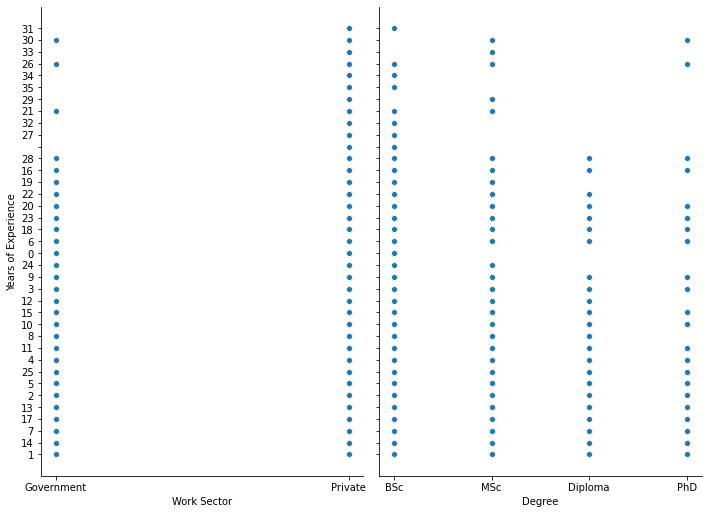

In [6]:
sns.pairplot(df, x_vars=[ 'Work Sector','Degree'], y_vars='Years of Experience', size=7, aspect=0.7)

### Finding Range 

In this graphs we are finding the range of pleoples with skills which have been shown from dark to light color and point in the gaphs are shown the level of personal skills between the range of 0 to 0.8

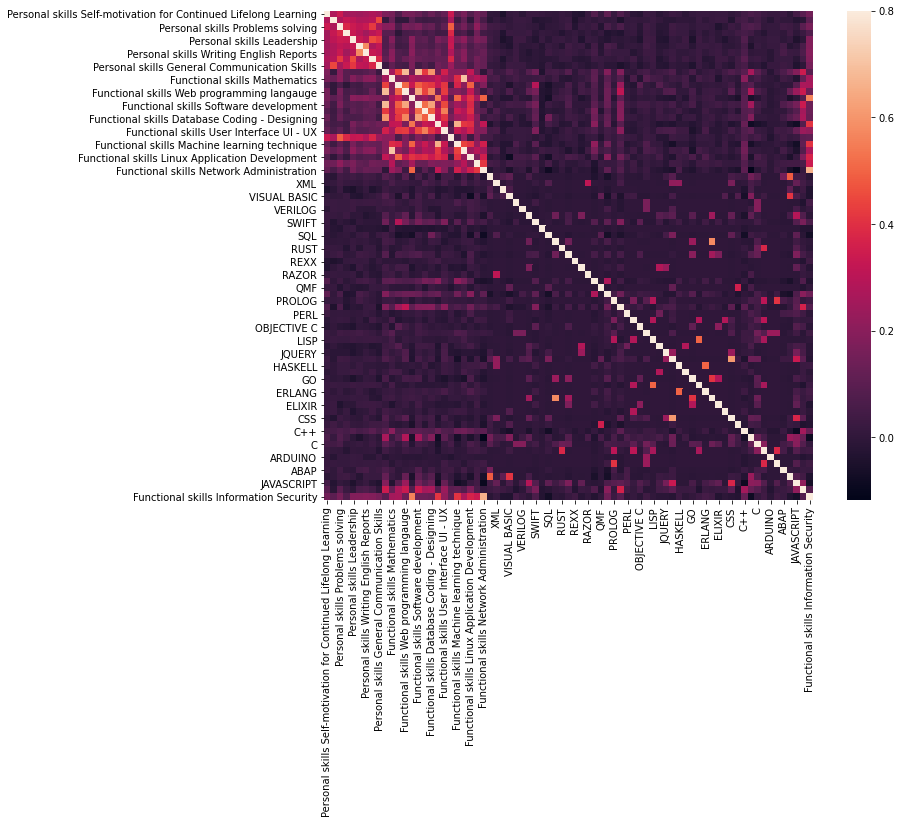

In [7]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

### Droping Irrelevant Features 

Droping most of the features which are irelevant features for our training data which effect our final accuracy

In [8]:
#Using drop function which take argument as an array of column to be droped
new_df = df.drop(columns=["Timestamp",
        "Your email if you are interested to get the results",
        'Job Location','Nationality','Knowledge of programming languages',
        'University Location','Region','Salary range'])

### Dummy Encoding 

Dummy coding is used when categorical variables (e.g., sex, geographic location, ethnicity) are of interest in prediction. It provides one way of using categorical predictor variables in various kinds of estimation models, such as linear regression. Dummy coding uses only 1s and 0s to convey all the necessary information on group membership. With this kind of coding, the researcher enters a 1 to indicate that a person is a member of a category, and a 0 otherwise.

In [9]:
#a new x_df variable defined and make a new data fram which do not contain droped values 
x_df = pd.DataFrame(new_df)
# now remove feature job classify whihc will be frthure use as a target valriable in future code
x_df =x_df.drop(columns=["job_classify"])
# this part is most important for the data to handle, all data which are given in the
#form of string or alphabets have to be convert this data as a binary forms and transform in 
#multiple columns in  the form of 0's and 1's
#this website describe better  (https://gerardnico.com/data_mining/dummy)

x_train = pd.get_dummies(x_df , columns = ['Work Sector','Years of Experience' ,'job_title',
       'Gender', 'Degree', 'In which sector you are working in','Diploma or Bachelor university',
       'major',])

### Creating our target variable 

In [10]:
# creating a new variable in which define our y-target or category for mprediction
y_df = new_df['job_classify'].fillna('zero')
#importing library here to for label conde our strings labels to integers 
from sklearn.preprocessing import LabelEncoder
# creating a new initial dataframe which is a copy of our y_df to ensoure that our (y) variable 
#have only our target labels
y = pd.DataFrame(y_df, columns=['job_classify'])

y_labels = y.job_classify.unique()
#creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
y = labelencoder.fit_transform(y['job_classify'])


y_dict = dict(zip(y_labels, range(len(y_labels))))
y_category = y_dict.values()

#checking if values are encoded perfectly
print(y)

[7 5 9 ... 4 7 7]


### Spliting Data in to train and test 

In [11]:
# random shuffling data using seed t o
seed = 7
np.random.seed(seed)
# split into 80% for train and 320% for test 
X_train, X_test, y_train, y_test = train_test_split(x_train, y, test_size=0.2, random_state=seed)

#x_train have (2255, 1287)
#x_test have (451, 1287)
#y_train (2255, 0)
#y_test have (451, 0)

### Decision Tree Classifier

Decision tree classifiers are utilized as a well known classification technique in different pattern recognition issues, for example, image classification and character recognition (Safavian & Landgrebe, 1991). Decision tree classifiers perform more successfully, specifically for complex classification problems, due to their high adaptability and computationally effective features. 

In [12]:
#importing library to use classifier 
from sklearn.tree import DecisionTreeClassifier
#DecisionTreeClassifier function takes several arugments 
cls = DecisionTreeClassifier(max_depth=100,random_state = 1000,
                             max_features = None,min_samples_leaf = 1)

### Training Data

In [13]:
#fit function is use to train the model 
cls.fit(X_train, y_train)
# Predicting the Test set results
acc = cls.score(X_test,y_test)
#Checking for result
acc

0.6917960088691796

### Cross Validation Checking 

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [14]:
#From sklearn library importing cross validation score function
from sklearn.model_selection import cross_val_score
#validating x_test and y_test values 
val_ac = cross_val_score(cls,X_train, y_train,cv=5 , scoring = 'accuracy')

In [15]:
#checking for mean validation accuracy
val_ac.mean()

0.6856802092951677

### Cross Validation Predictions 

Its a function to Checking the predictions of the validations side when we create model we check if our model is going right or wrong 

In [16]:
#importing cross validation prediction function from sklearn model selection
from sklearn.model_selection import cross_val_predict
#valdationg predictions of xtrain and y train data where taking 3 folding  
#here folding are the three sub-parts of x_train and Y_test data
y_train_pred=cross_val_predict(cls,X_train, y_train,cv=3 )

### Confusion Matrix

A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix. The confusion matrix shows the ways in which your classification model is confused when it makes predictions. It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.



In [17]:
#importing confusion matrix function
from sklearn.metrics import confusion_matrix
#creating a confusion matrix
conf_mat = confusion_matrix(y_train,y_train_pred)

#Un-comment next line to check the ideal confusion matrix look like 
#conf_mat = confusion_matrix(y_train,y_train)

In [18]:
#checking for matrix
conf_mat

array([[  2,   2,   1,   0,   2,   2,   0,   1,   1,   4,   0],
       [  0,  35,   0,   2,   4,   8,   1,   3,   1,   3,   0],
       [  1,   2,  19,   1,   1,   8,   0,   1,   2,   5,   2],
       [  1,   5,   3,  20,   8,  19,   2,   1,   5,  14,   1],
       [  3,   5,   4,   7,  54,  34,   6,   2,  12,  20,   1],
       [  4,  10,   4,  20,  21, 182,  12,   9,  12,  43,   0],
       [  2,   1,   1,   0,   4,  16,   2,   1,   7,  12,   0],
       [  1,   1,   1,   1,   5,   8,   5, 348,   4,   6,   0],
       [  0,   3,   1,   2,   9,  17,   5,   3,  57,  16,   1],
       [  1,   4,   2,  10,   7,  45,   6,   8,  11, 468,   0],
       [  0,   1,   0,   1,   0,   2,   1,   2,   0,   3,  34]],
      dtype=int64)

### Ploting confusion matrix 

0 	:   ProgrammesDeveloper
1 	:   InfromationSystemsAdministrator
2 	:   SystemsAnalyst
3 	:   InformationandNetworkTechnologySpecialist
4 	:   zero
5 	:   ComputerNetworkSpecialist
6 	:   NotRelated
7 	:   DatabaseandNetworkSpecialistNotElsewhereClassified
8 	:   ProgrammesandApplicationsDevelopersandAnalystNotElsewhereClassified
9 	:   DatabaseDesignerandAdministrator
10 	:   ComputerApplicationsProgrammer
Confusion matrix, without normalization
[[  1   0   0   1   1   2   0   0   1   1   0]
 [  0  12   0   1   0   3   0   0   0   0   0]
 [  0   0   4   0   1   2   0   0   2   0   0]
 [  0   2   0   3   1   3   1   0   0   2   0]
 [  0   1   1   1  14  12   2   3   0   1   1]
 [  0   3   2   6   9  61   1   3   2  10   0]
 [  0   1   2   0   2   3   0   1   1   1   0]
 [  0   0   1   1   3   3   0  95   1   0   0]
 [  0   0   0   1   2   3   0   0   7   3   0]
 [  0   1   1   8   5   6   1   2   1 109   0]
 [  0   0   0   0   2   1   0   0   0   0   6]]
Normalized confusion matrix
[[

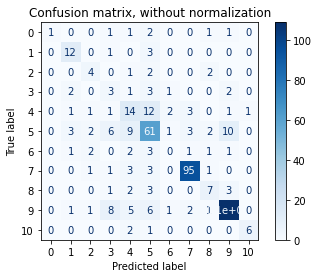

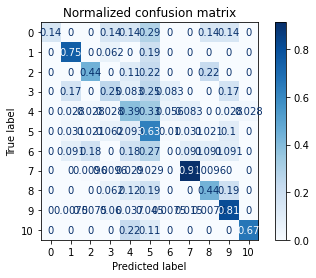

In [19]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for key,value in y_dict.items():
    print(value,'\t:  ',key)
from sklearn.metrics import plot_confusion_matrix
for title, normalize in titles_options:
    disp = plot_confusion_matrix(cls, X_test, y_test,
                                 display_labels=y_category,
                                 cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### Precision Score 

Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.

Precision = TP/TP+FP

In [20]:
#importing library for precision scroe function  and recall score function
from sklearn.metrics import precision_score, recall_score
# applying precediong function taking arguments 
precision_scr = precision_score(y_train,y_train_pred,average='weighted')

In [21]:
#checking precision results
precision_scr

0.6689780455926148

### Recall Score

Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? We have got recall of 0.631 which is good for this model as it’s above 0.5.

Recall = TP/TP+FN

In [22]:
# applying recall function taking arguments 

recall_scr = recall_score(y_train,y_train_pred,average='weighted')

In [23]:
#checking for recall score
recall_scr

0.676829268292683

### F1 score

F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall. In our case, F1 score is 0.701.

F1 Score = 2*(Recall * Precision) / (Recall + Precision)

In [24]:
#importing f1-score function from sklearn library
from sklearn.metrics import f1_score
# applying f1-score function
f1_score = f1_score(y_train,y_train_pred,average='weighted')

In [25]:
#checking f1-score accuracy
f1_score

0.671595957821092